In [1]:
import data_utils.data_analysis as data_analysis

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#READ THE DATASET
filename='datasets/galadriel_dataset_24_06_06.h5'
df_input,df_time_val,df_time,df_freq_val,df_freq_int = data_analysis.read_dataset(filename)

Input DF
       shot number  order2  order3     order4
0            69962   34900  -17000 -4600000.0
1            69963   34900  -17000 -4600000.0
2            69964   34900  -17000 -4500000.0
3            69965   34900  -17000 -4500000.0
4            69966   34900  -17000 -4500000.0
...            ...     ...     ...        ...
15502        85466   35400   29000 -3800000.0
15503        85467   35400   29000 -3800000.0
15504        85468   35400   29000 -3700000.0
15505        85469   35400   29000 -3700000.0
15506        85470   35400   29000 -3700000.0

[15507 rows x 4 columns]
----
Time values
0    -115.458450
1    -104.962227
2     -94.466005
3     -83.969782
4     -73.473559
5     -62.977336
6     -52.481114
7     -41.984891
8     -31.488668
9     -20.992445
10    -10.496223
11      0.000000
12     10.496223
13     20.992445
14     31.488668
15     41.984891
16     52.481114
17     62.977336
18     73.473559
19     83.969782
20     94.466005
21    104.962227
Name: 0, dtype: float6

In [3]:
df_input.describe()

,shot number,order2,order3,order4
count,15507.000000,15507.000000,15507.000000,1.550700e+04
mean,77715.752047,35149.974205,5999.355130,-4.116709e+06
std,4477.209655,158.112861,13563.656746,2.910772e+05
min,69962.000000,34900.000000,-17000.000000,-4.600000e+06
25%,73838.500000,35000.000000,-6000.000000,-4.400000e+06
50%,77716.000000,35150.000000,6000.000000,-4.100000e+06
75%,81592.500000,35300.000000,18000.000000,-3.900000e+06
max,85470.000000,35400.000000,29000.000000,-3.600000e+06


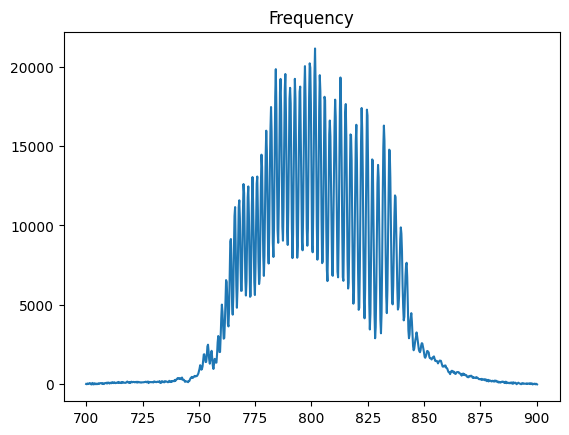

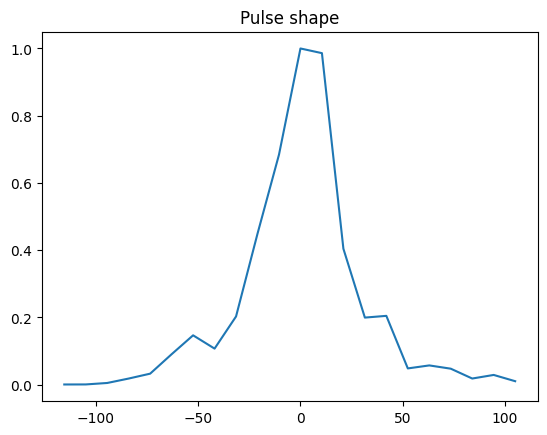

In [12]:
#plot a random shot
shot_index=2000
plt.plot(df_freq_val,df_freq_int.loc[shot_index])
#plt.plot(df_freq_val)
plt.title('Frequency')
plt.show()

plt.plot(df_time_val,df_time.loc[shot_index])
plt.title('Pulse shape')
plt.show()

## Check for extreme values in the raw data

In [5]:
maxval_freq=df_freq_int.max(axis=1)
#for i,v in maxval_freq.items():
#    if(v<8000 or v>65000):
#        print(i,v)

Text(0, 0.5, 'Num. shots')

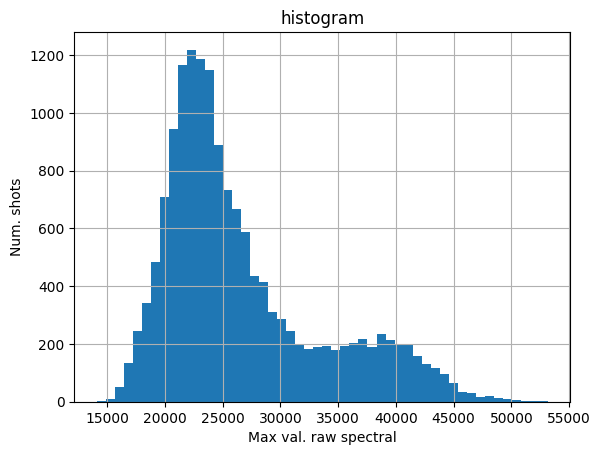

In [6]:
maxval_freq.hist(bins=50)
plt.title('histogram')
plt.xlabel('Max val. raw spectral')
plt.ylabel('Num. shots')

## Variance analysis

In [7]:
#Calculate the variance
dup_shots=2
df_time_var=data_analysis.get_var(df_input,df_time,dup_shots)
df_time_var_sum=df_time_var.sum(axis=1)

Text(0.5, 1.0, 'Histogram      (total num. shots=15507)')

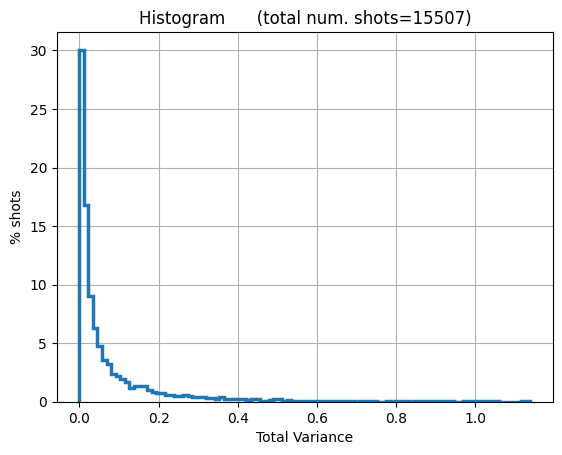

In [8]:
weights_time = 100*np.ones_like(df_time_var_sum) / len(df_time_var_sum)
df_time_var_sum.hist(bins=100,weights=weights_time,histtype="step",linewidth=2.5)
plt.ylabel('% shots')
plt.xlabel('Total Variance')
plt.title('Histogram      (total num. shots='+str(len(df_time_var_sum))+')')

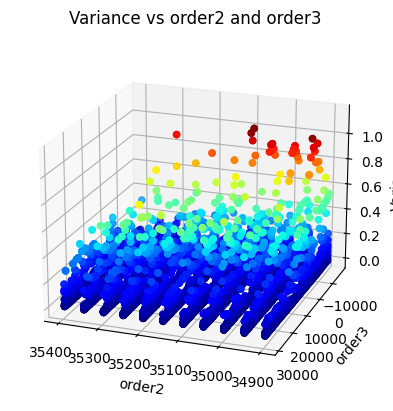

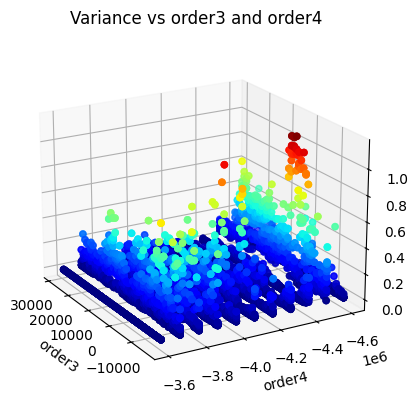

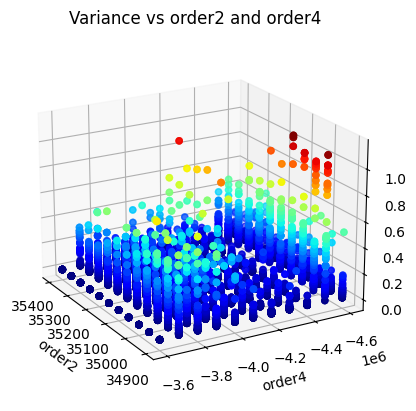

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_input['order2'], df_input['order3'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax.set_xlabel('order2')
ax.set_ylabel('order3')
ax.set_zlabel('Variance')
ax.view_init(elev=20., azim=110)
plt.title('Variance vs order2 and order3')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(df_input['order3'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax2.set_xlabel('order3')
ax2.set_ylabel('order4')
ax2.set_zlabel('Variance')
ax2.view_init(elev=20., azim=150)
plt.title('Variance vs order3 and order4')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(df_input['order2'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax3.set_xlabel('order2')
ax3.set_ylabel('order4')
ax3.set_zlabel('Variance')
ax3.view_init(elev=20., azim=150)
plt.title('Variance vs order2 and order4')
plt.show()